### Import necessary libraries

In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from itertools import product
import seaborn as sns
from statsmodels.graphics.mosaicplot import mosaic

In [81]:
data=pd.read_csv('ev_sales.csv')
data = data.drop(['Unnamed: 0'], axis = 1)
data.head()

,vehicle type,max sales volume,market share,state,Public EV Charging Stations,Average gross income
0,ADAPTED VEHICLE,5,0.004419,Karnataka,136,223175
1,AGRICULTURAL TRACTOR,1,0.000884,Punjab,11,151491
2,BUS,233,0.205941,Maharashtra,317,202130
3,E-RICKSHAW(P),49885,44.091781,Uttar Pradesh,108,65431
4,E-RICKSHAW WITH CART (G),2658,2.349323,Uttar Pradesh,108,65431


In [82]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 6 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   vehicle type                 24 non-null     object 
 1   max sales volume             24 non-null     int64  
 2   market share                 24 non-null     float64
 3   state                        24 non-null     object 
 4   Public EV Charging Stations  24 non-null     int64  
 5   Average gross income         24 non-null     int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 1.2+ KB


In [83]:
data.describe()

,max sales volume,market share,Public EV Charging Stations,Average gross income
count,24.000000,24.000000,24.000000,24.000000
mean,4714.125000,4.166667,174.458333,196986.750000
std,12894.810319,11.397317,166.963932,77113.298069
min,1.000000,0.000884,4.000000,65431.000000
25%,2.750000,0.002431,27.000000,143984.000000
50%,63.500000,0.056126,136.000000,213396.000000
75%,2686.000000,2.374071,238.250000,223175.000000
max,49885.000000,44.091781,597.000000,376221.000000


### Check for null values in the data

In [84]:
data.isnull().sum()

vehicle type                   0
max sales volume               0
market share                   0
state                          0
Public EV Charging Stations    0
Average gross income           0
dtype: int64

In [85]:
data.dtypes

vehicle type                    object
max sales volume                 int64
market share                   float64
state                           object
Public EV Charging Stations      int64
Average gross income             int64
dtype: object

In [86]:
data['state'].unique()

array(['Karnataka', 'Punjab', 'Maharashtra', 'Uttar Pradesh', 'Gujarat',
       'Tamil Nadu', 'West Bengal', 'Haryana', 'Delhi',
       'Jammu and Kashmir', 'Chhattisgarh'], dtype=object)

### Convert features of string data type into numeric data

In [87]:
for label, content in data.items():
    if not pd.api.types.is_numeric_dtype(data[label]):
        lst = data[label].unique()
        label_map = {}
        for i in range(len(lst)):
            label_map[lst[i]] = i
        data[label] = data[label].map(label_map)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 6 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   vehicle type                 24 non-null     int64  
 1   max sales volume             24 non-null     int64  
 2   market share                 24 non-null     float64
 3   state                        24 non-null     int64  
 4   Public EV Charging Stations  24 non-null     int64  
 5   Average gross income         24 non-null     int64  
dtypes: float64(1), int64(5)
memory usage: 1.2 KB


### Drop features with high correlation

<AxesSubplot:>

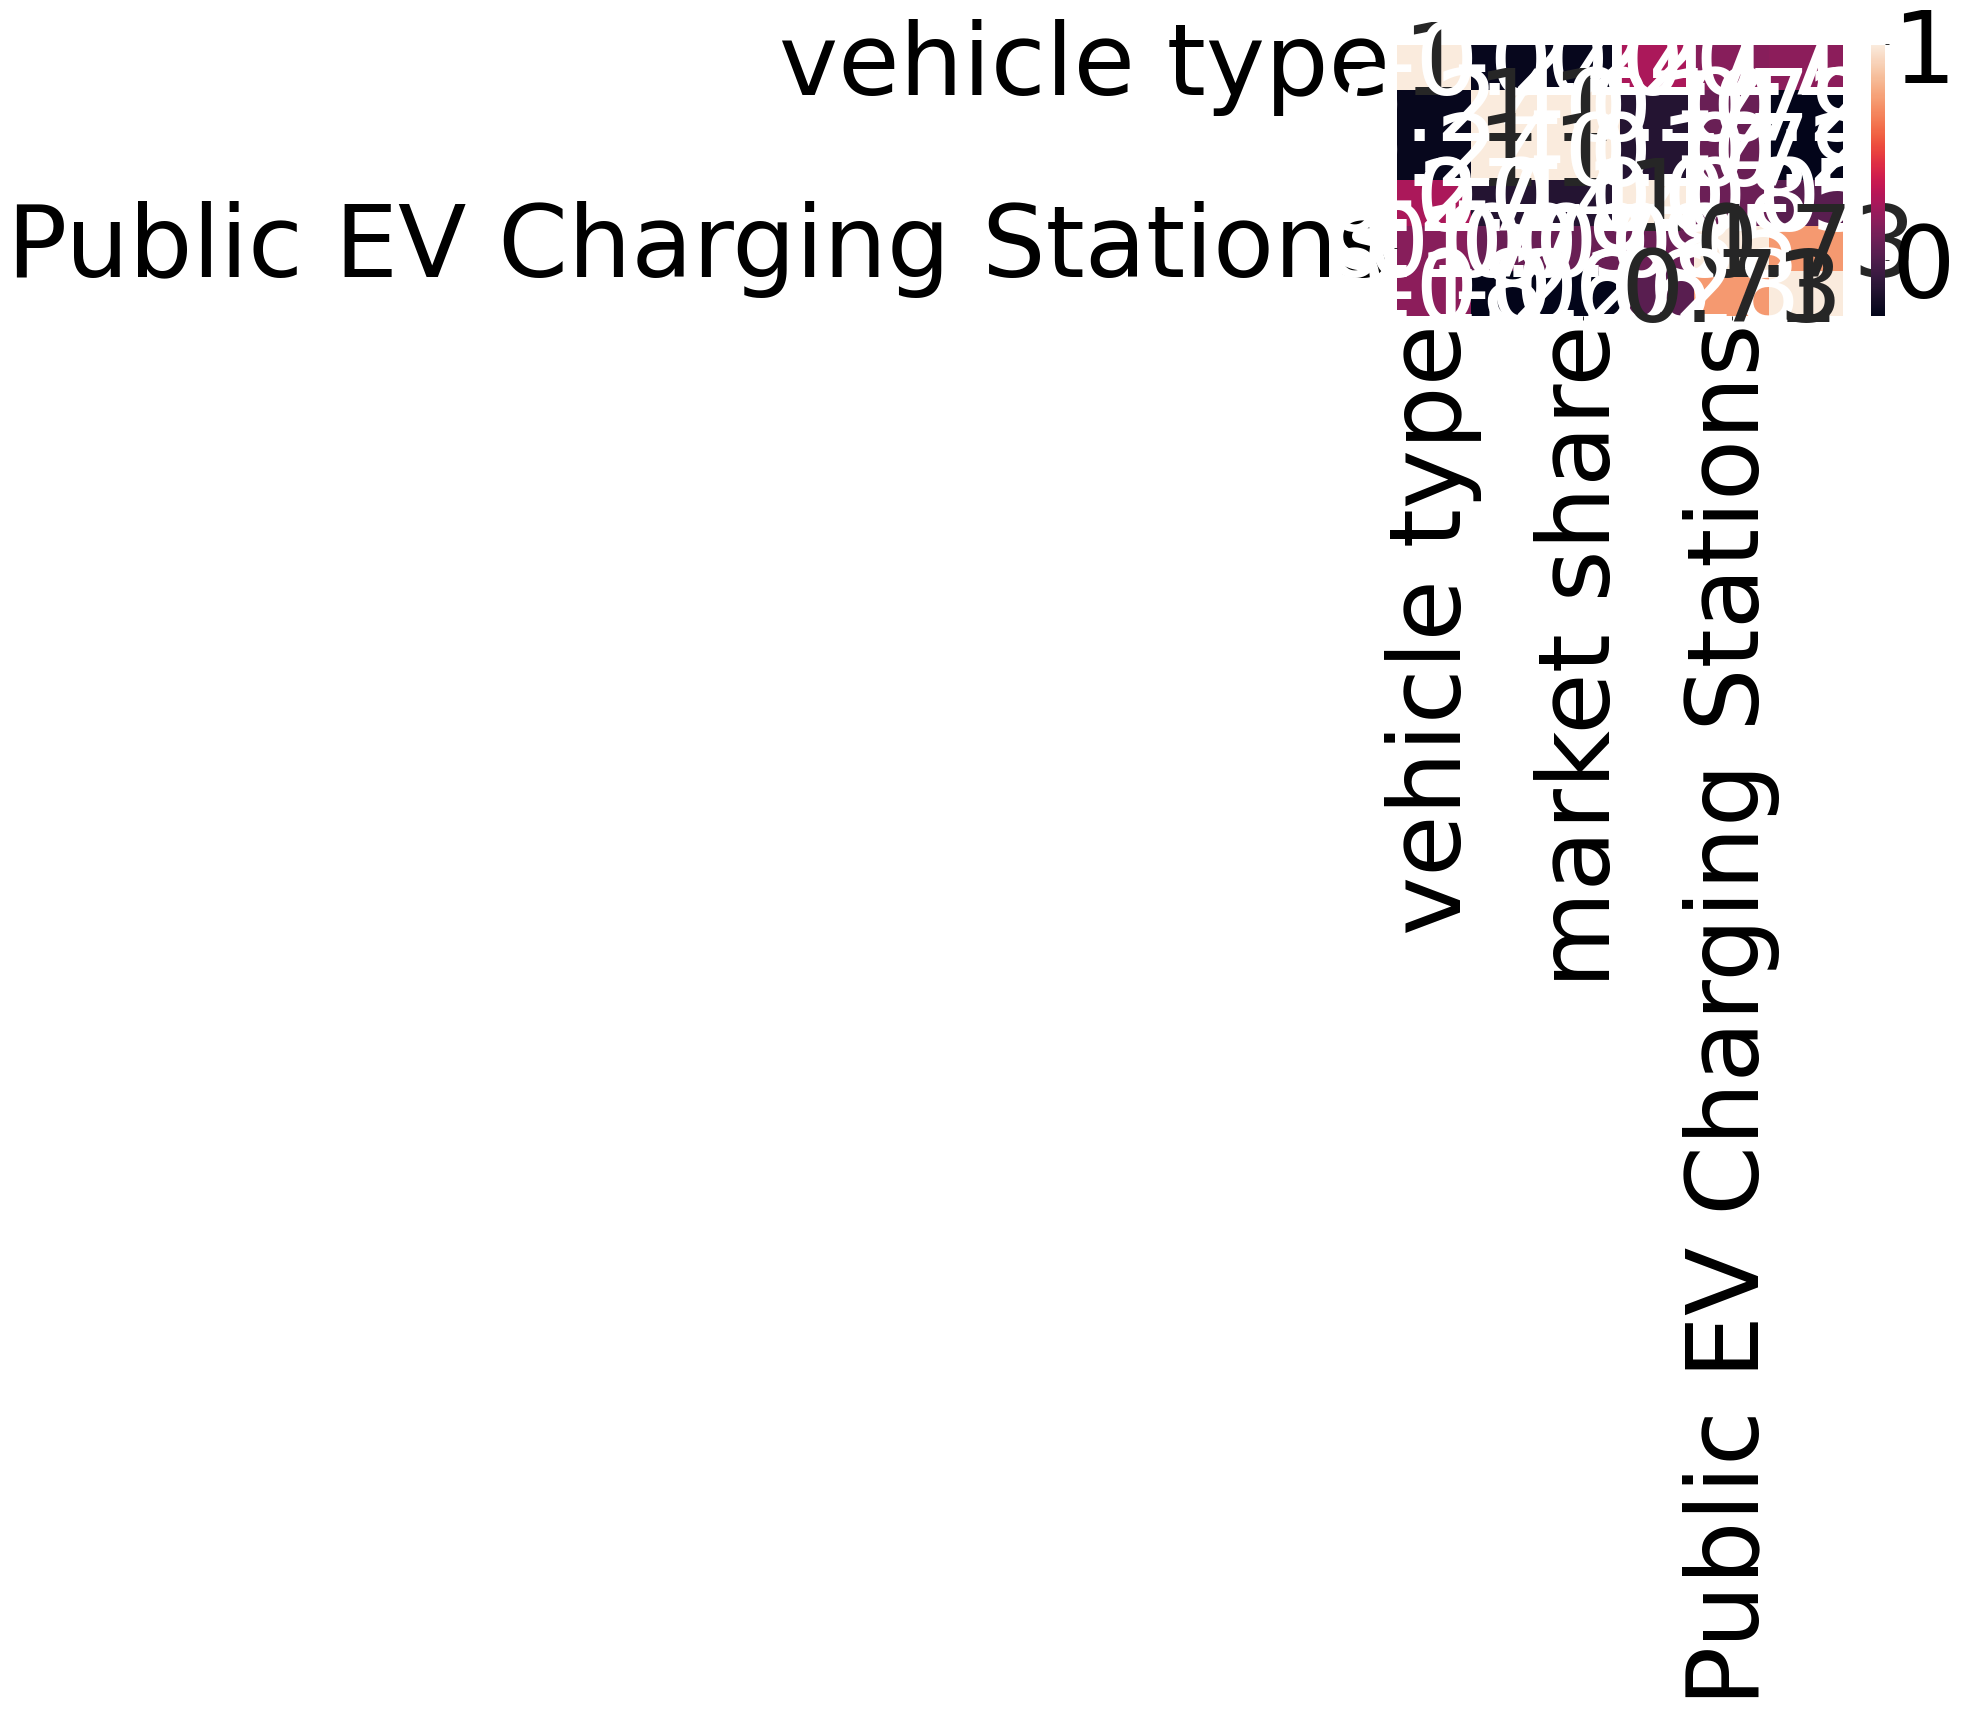

In [88]:
plt.figure(figsize=(10,5))
sns.heatmap(data.corr(), annot=True)

As `max sales volume` and `market share` are 100% correlated, we have to drop one of the columns.

In [89]:
data.drop("max sales volume", axis=1, inplace=True)
data.head()

,vehicle type,market share,state,Public EV Charging Stations,Average gross income
0,0,0.004419,0,136,223175
1,1,0.000884,1,11,151491
2,2,0.205941,2,317,202130
3,3,44.091781,3,108,65431
4,4,2.349323,3,108,65431


In [90]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 5 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   vehicle type                 24 non-null     int64  
 1   market share                 24 non-null     float64
 2   state                        24 non-null     int64  
 3   Public EV Charging Stations  24 non-null     int64  
 4   Average gross income         24 non-null     int64  
dtypes: float64(1), int64(4)
memory usage: 1.1 KB


### Saving the new csv file as `data_modified.csv`

In [91]:
data.to_csv("data_modified.csv", index=False)

In [92]:
data_modified=pd.read_csv("data_modified.csv")
data_modified.head()

,vehicle type,market share,state,Public EV Charging Stations,Average gross income
0,0,0.004419,0,136,223175
1,1,0.000884,1,11,151491
2,2,0.205941,2,317,202130
3,3,44.091781,3,108,65431
4,4,2.349323,3,108,65431


### Graph between WCSS and number of clusters

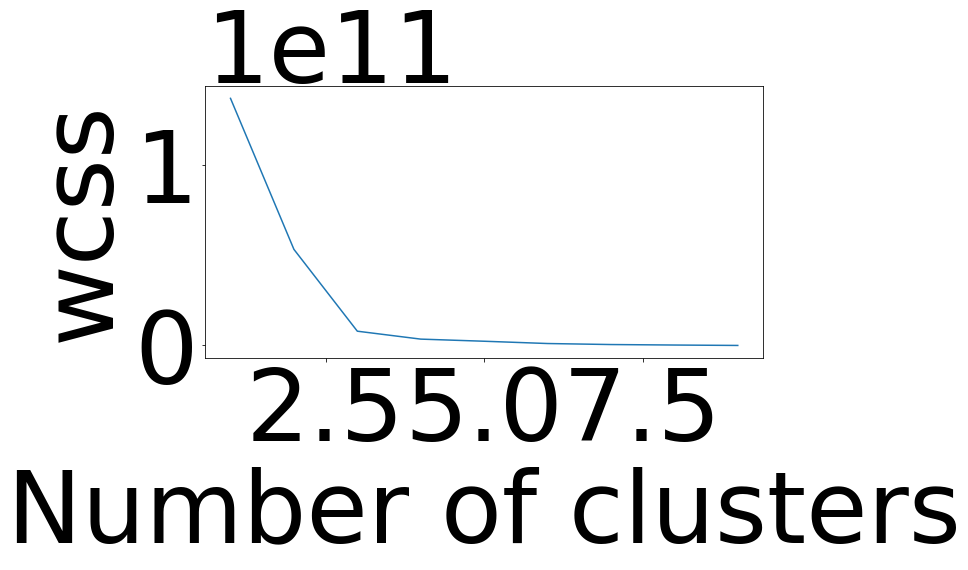

In [93]:
wcss = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(data_modified)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10, 5))
plt.plot(range(1, 10), wcss)
plt.xlabel('Number of clusters')
plt.ylabel('wcss')
plt.show()

From 3 number of clusters, we almost achieve a straight line.

In [94]:
kmeans = KMeans(3, init = 'k-means++', random_state=42).fit(data_modified)
data_modified['cluster_number'] = kmeans.labels_

In [95]:
data_modified

,vehicle type,market share,state,Public EV Charging Stations,Average gross income,cluster_number
0,0,0.004419,0,136,223175,0
1,1,0.000884,1,11,151491,1
2,2,0.205941,2,317,202130,0
3,3,44.091781,3,108,65431,1
4,4,2.349323,3,108,65431,1
5,5,0.026516,4,27,213936,0
6,6,0.054800,5,212,213396,0
7,7,0.009723,6,22,121463,1
8,8,0.000884,7,55,247628,0
9,9,37.529941,2,317,202130,0


### Visualize the clusters w.r.t the state

In [96]:
cross_state = pd.crosstab(data_modified['cluster_number'], data_modified['state'])
cross_state

state,0,1,2,3,4,5,6,7,8,9,10
cluster_number,,,,,,,,,,,
0,5,0,4,0,2,3,0,1,0,0,0
1,0,1,0,2,0,0,2,0,0,1,1
2,0,0,0,0,0,0,0,0,2,0,0


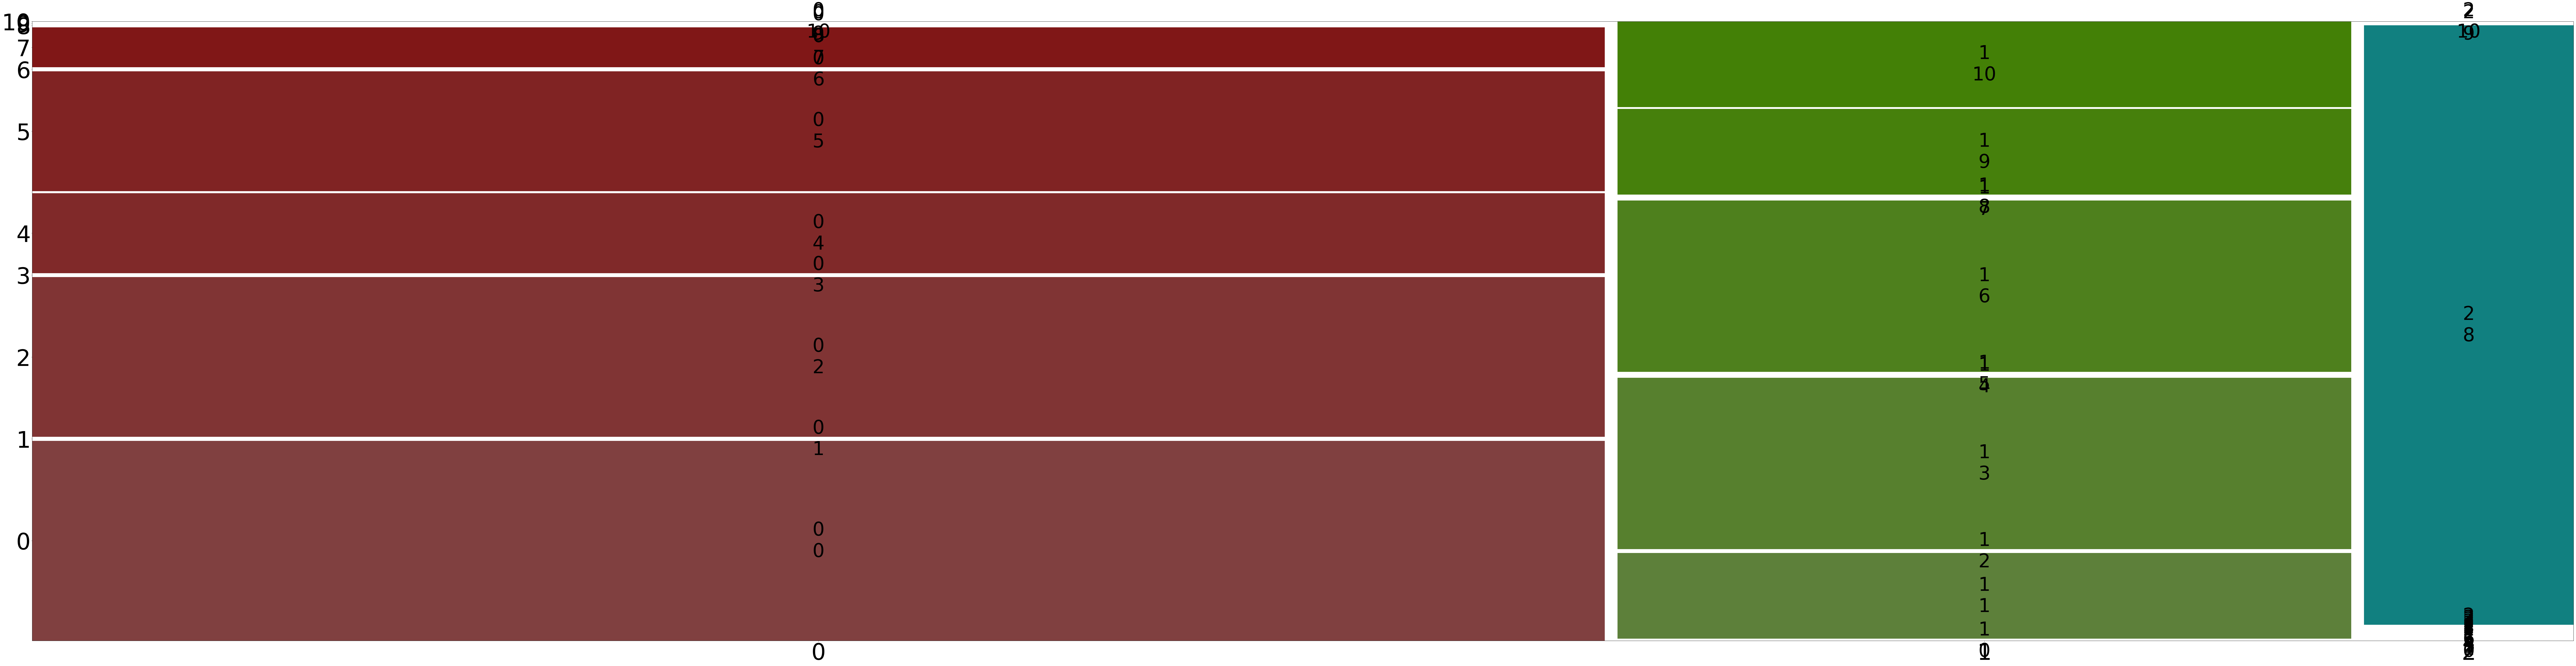

In [97]:
%matplotlib inline
plt.rcParams["figure.figsize"] = [200, 50]
plt.rcParams['font.size'] = 100
mosaic(cross_state.stack())
plt.show();

### Visualize the clusters w.r.t the vehicle type

In [98]:
cross_vehicleType = pd.crosstab(data_modified['cluster_number'], data_modified['vehicle type'])
cross_vehicleType

vehicle type,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
cluster_number,,,,,,,,,,,,,,,,,,,,,
0,1,0,1,0,0,1,1,0,1,1,...,1,1,1,1,0,0,0,1,0,1
1,0,1,0,1,1,0,0,1,0,0,...,0,0,0,0,1,1,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


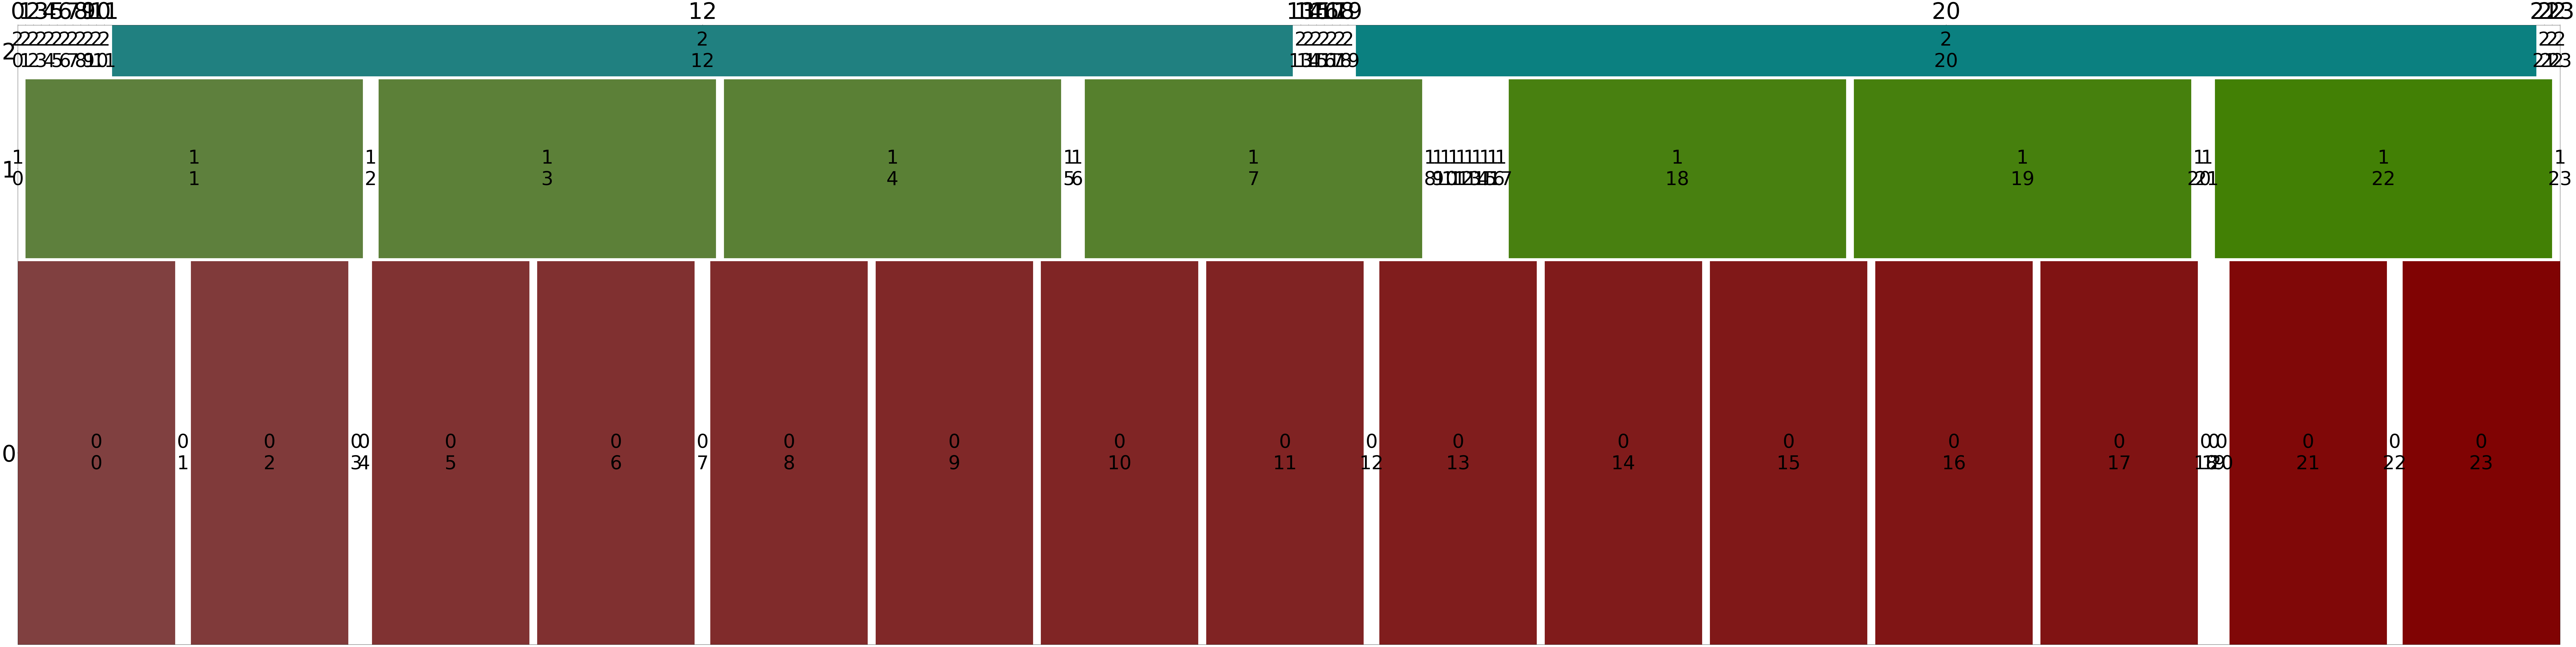

In [99]:
%matplotlib inline
plt.rcParams["figure.figsize"] = [200, 50]
plt.rcParams['font.size'] = 100
mosaic(cross_vehicleType.stack(), horizontal=False)
plt.show();